In [1]:
import numpy as np
import pandas as pd 
from pylab import plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
data = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [4]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [5]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


In [7]:
data.isnull().sum()

AAPL.O    78
MSFT.O    78
INTC.O    78
AMZN.O    78
GS.N      78
SPY       78
.SPX      78
.VIX      78
EUR=       0
XAU=       5
GDX       78
GLD       78
dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

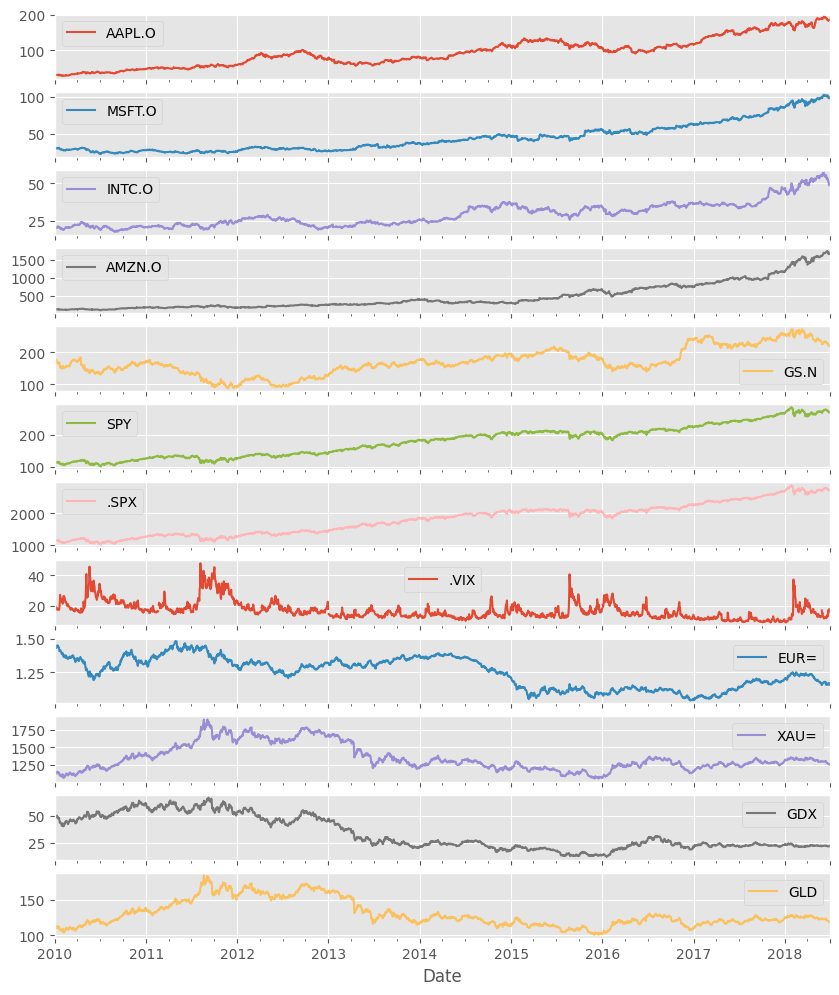

In [8]:
data.plot(figsize=(10,12), subplots=True)

In [9]:
#data column symbol's for financial instruments are called Reuters Instrument Codes or RIC's
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [10]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [11]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [12]:
data.aggregate(['min', 'mean', 'std', 'max'])

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000


To calculate changes over time (absolute differences, percentage changes, log returns)

In [13]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [14]:
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

Percentage changes are preffered since absolute ones depend on the scale of the time series data 

In [15]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


<Axes: >

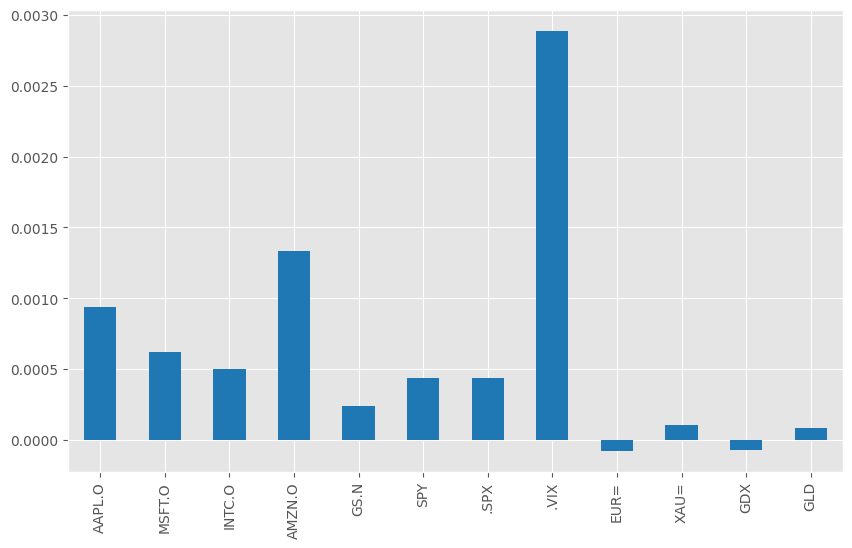

In [ ]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6), colormap='tab20')

In some scenarios log returns can be easier to handle.

In [17]:
rets = np.log(data / data.shift(1)) 
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


To visualize the cumulative log returns over time

<Axes: xlabel='Date'>

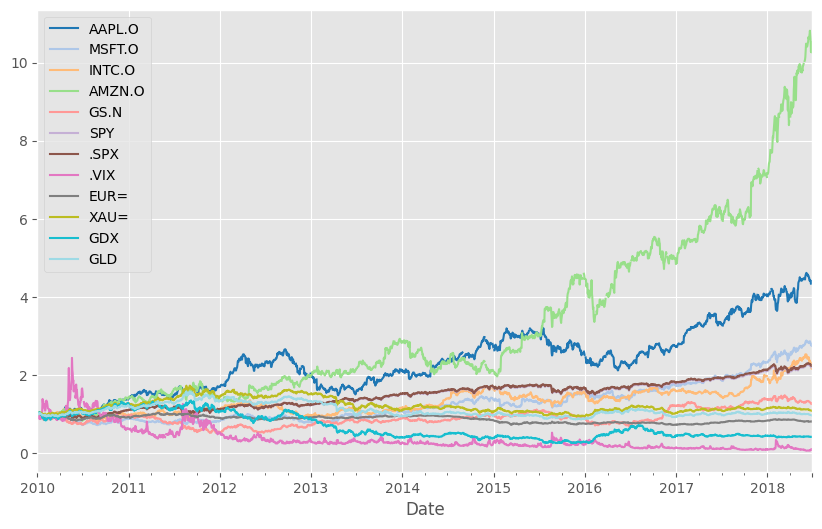

In [18]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6), colormap='tab20')

Resampling (downsampling or upsamplig) a time series is useful to transform the resolution of our series 

In [19]:
#by default week ends in sunday
#labels: right set index at the end of the period, left at the begining
data.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [20]:
data.resample('1m', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


<Axes: xlabel='Date'>

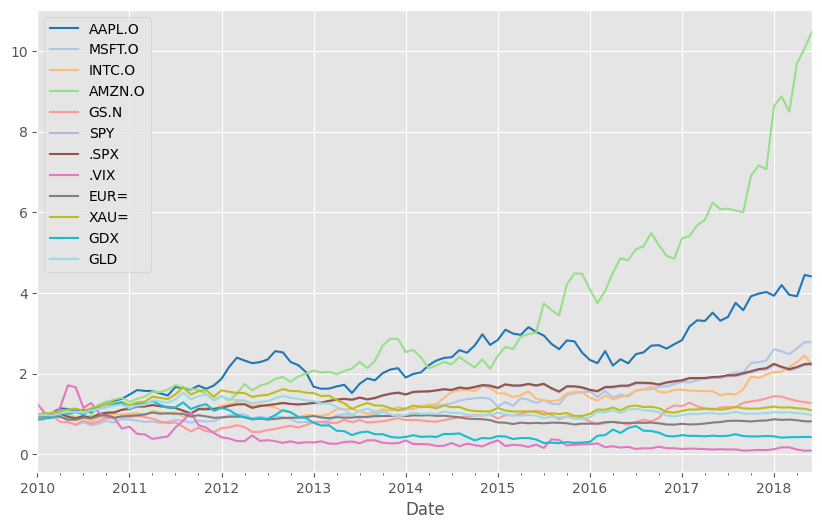

In [21]:
#To plot the cumulative log returns over time
rets.cumsum().apply(np.exp).resample('1m', label ='right').last().plot(figsize=(10,6),colormap='tab20')

Now, lets do some rolling statistics with the amazon stock instrument 

In [22]:
sym = 'AMZN.O'
#first we clean our data and turn it into a data frame
data = pd.DataFrame(data[sym]).dropna()

In [23]:
data.tail()

,AMZN.O
Date,
2018-06-25,1663.15
2018-06-26,1691.09
2018-06-27,1660.51
2018-06-28,1701.45
2018-06-29,1699.80


In [24]:
#Now define the window time for our exercise
window=20
data['min']=data[sym].rolling(window=window).min()
data['mean']=data[sym].rolling(window=window).mean()
data['std']=data[sym].rolling(window=window).std()
data['median']=data[sym].rolling(window=window).median()
data['max']=data[sym].rolling(window=window).max()

In [25]:
#Now calculate the exponentially weighted moving average, considering a half life of 0.5

data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [26]:
data.dropna().head()

,AMZN.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,118.87,118.87,126.9954,4.720854,127.245,134.69,120.481121
2010-02-02,118.12,118.12,126.2064,4.823690,126.880,134.69,118.710280
2010-02-03,119.10,118.12,125.4269,4.636632,126.325,133.52,119.002570
2010-02-04,115.94,115.94,124.6114,4.804682,125.905,133.52,116.705643
2010-02-05,117.39,115.94,123.9809,4.887015,125.595,133.52,117.218911


<Axes: xlabel='Date'>

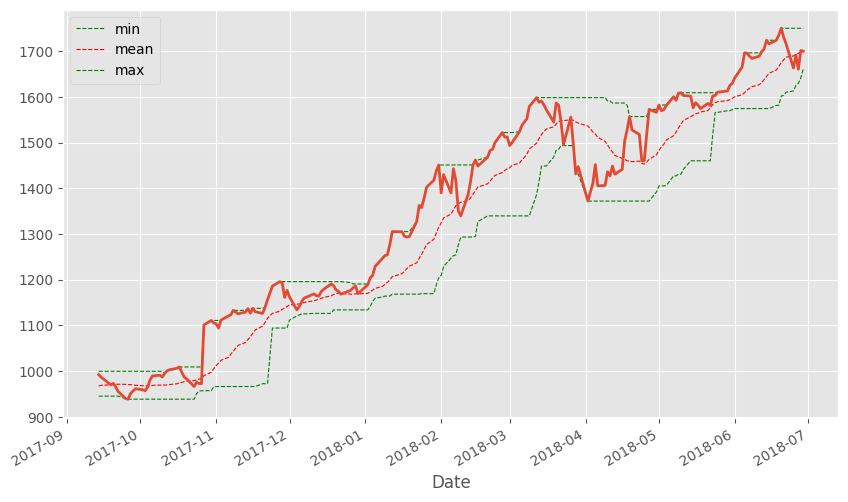

In [ ]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

Technical analysis using 2 simple moving averages

In [30]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

In [31]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN.O,SMA1,SMA2
Date,,,
2018-06-25,1663.15,1634.929405,1262.742202
2018-06-26,1691.09,1639.051548,1265.508512
2018-06-27,1660.51,1641.144167,1268.221726
2018-06-28,1701.45,1644.366071,1271.043631
2018-06-29,1699.80,1647.164643,1273.916131


<Axes: xlabel='Date'>

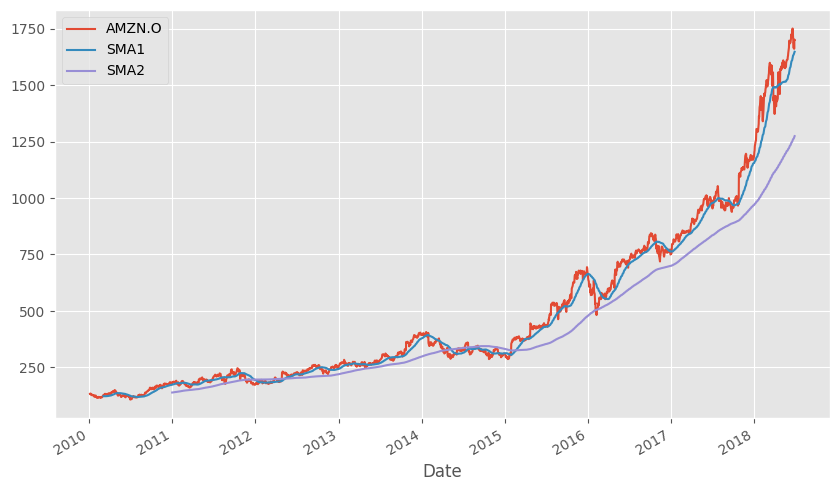

In [32]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

In [33]:
data.describe()

,AMZN.O,min,mean,std,median,max,ewma,SMA1,SMA2
count,2138.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2097.000000,1887.000000
mean,480.461251,452.749505,476.551191,13.898352,476.676591,499.105273,483.379359,472.245693,441.384006
std,372.307818,347.183131,363.637886,12.938258,363.869313,378.718414,372.140045,353.912288,282.637954
min,108.610000,108.610000,116.694500,1.775140,117.915000,123.650000,109.517173,119.256000,139.141598
25%,213.595000,193.700000,214.570325,5.696460,214.375000,225.620000,215.817475,210.947143,212.843428
50%,322.065000,302.860000,322.502500,9.101073,321.875000,338.640000,324.116958,323.712095,332.898115
75%,698.850000,642.350000,680.658000,17.116765,692.785000,717.930000,705.761159,663.964286,627.644048
max,1750.080000,1660.510000,1701.688000,80.301022,1699.275000,1750.080000,1745.456070,1647.164643,1273.916131


In [35]:
data.dropna(inplace=True)

In [36]:
data.describe()


,AMZN.O,min,mean,std,median,max,ewma,SMA1,SMA2
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,525.883663,492.498183,518.216069,15.008802,518.344177,542.543947,525.615990,509.597218,441.384006
std,373.392782,347.687010,364.132317,13.280363,364.387149,379.187256,373.053273,353.881893,282.637954
min,160.970000,160.970000,167.416250,2.454017,167.480000,172.790000,161.854001,173.927738,139.141598
25%,251.325000,239.450000,250.227300,6.374305,250.644775,260.640000,251.464937,245.013208,212.843428
50%,358.660000,323.890000,352.788500,10.243247,355.895000,373.230000,358.634731,341.597262,332.898115
75%,755.725000,719.070000,756.786250,18.565686,758.987500,772.560000,755.620875,740.332024,627.644048
max,1750.080000,1660.510000,1701.688000,80.301022,1699.275000,1750.080000,1745.456070,1647.164643,1273.916131


In [37]:
 data['positions'] = np.where(data['SMA1'] > data['SMA2'],  1,  -1)

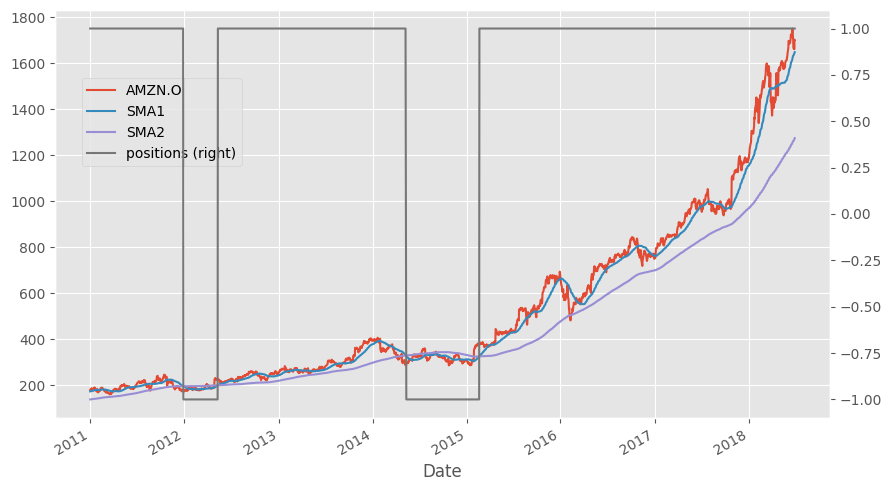

In [39]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

Including opening and closing trades, we can identify six trades in total.

Note that when the SMA1>SMA2 is a buy signal. Otherwise is recommended to sell.

Lets analyse the correlation between S\&P 500 and the VIX

In [40]:
raw = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

data2 = raw[['.SPX', '.VIX']].dropna()

In [41]:
data2.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

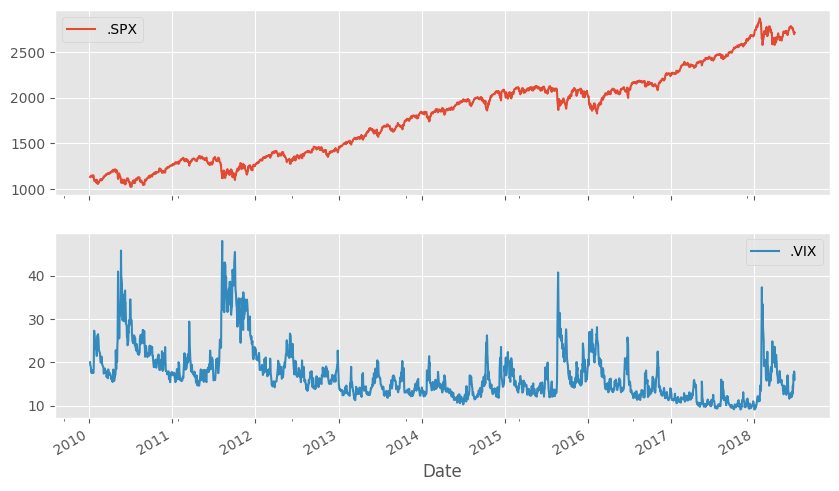

In [43]:
data2.plot(subplots=True, figsize=(10,6))

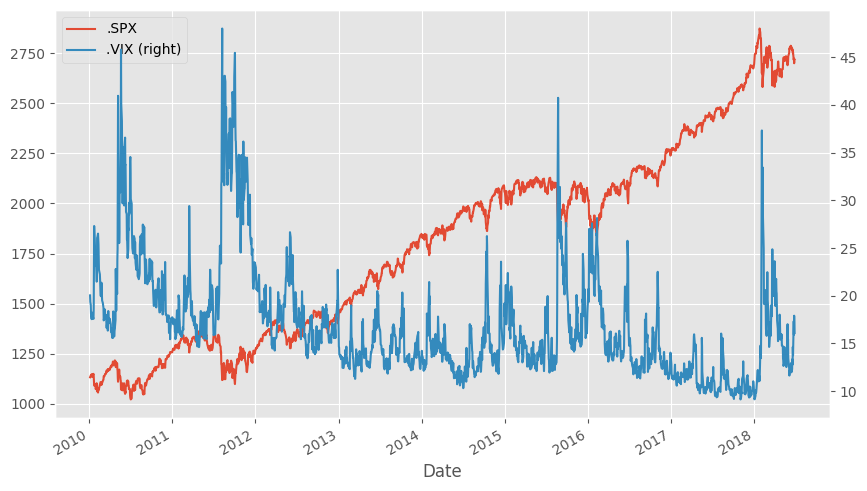

In [44]:
data2.plot(secondary_y='.VIX', figsize=(10, 6));

In [45]:
rets = np.log(data2 / data2.shift(1))

In [46]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [47]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

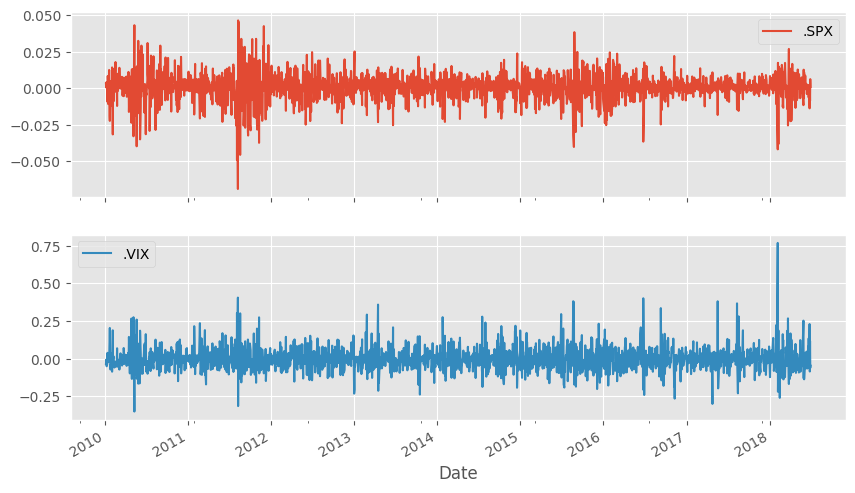

In [48]:
rets.plot(subplots=True, figsize=(10,6))

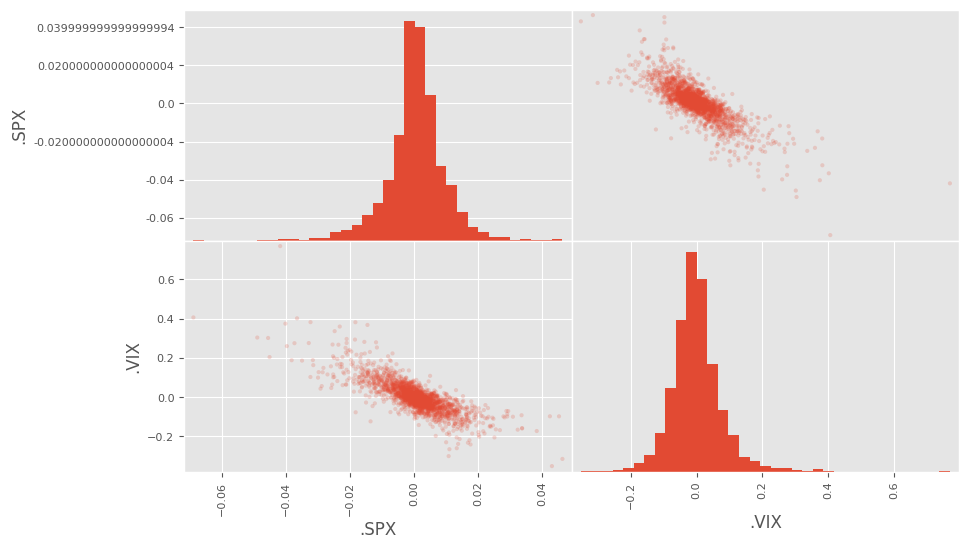

In [49]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6));

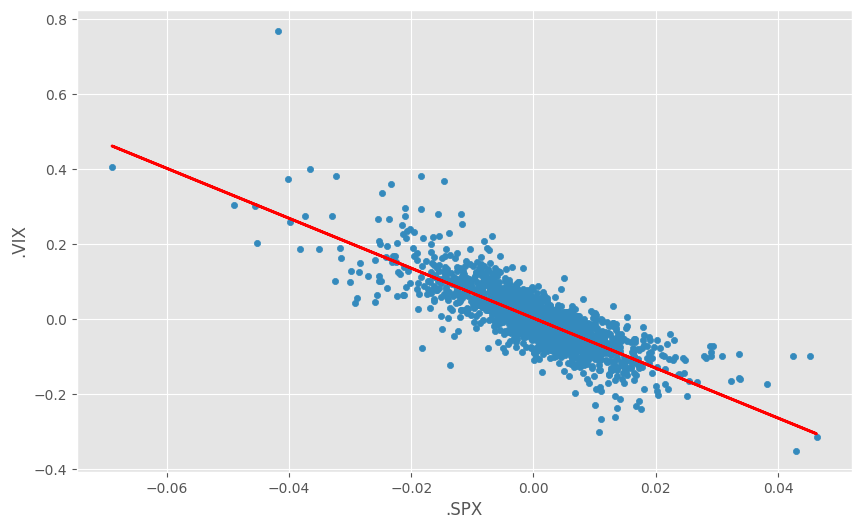

In [54]:
#lets apply a OLS regression analysis 
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1) 

ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);

In [55]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


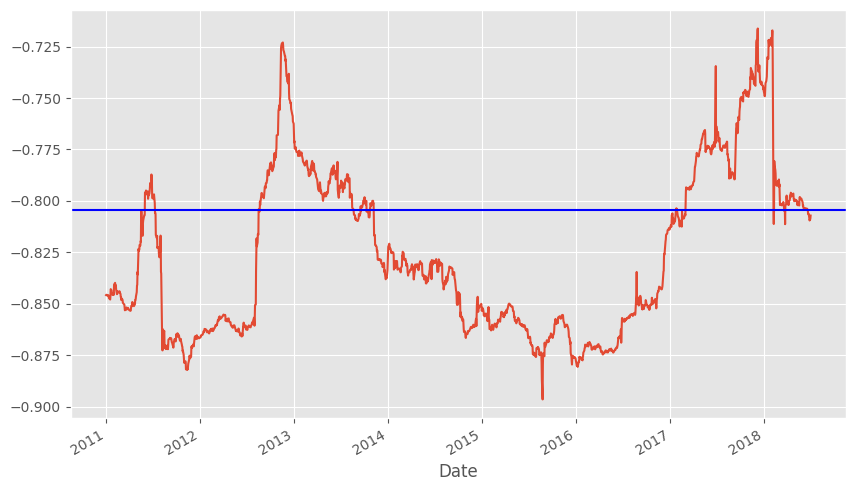

In [53]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='b')

In [ ]:
def checkMagazine(magazine, note):
    # Write your code here
    # mag_cont= Counter(magazine)

    # for word in note:
    #     if mag_cont[word]==0:
    #         print('No')
    #         return
    #     mag_cont[word]-=1
    # print('Yes')
    mag_count={}
    
    for word in magazine:
        if word in mag_count:
            mag_count[word]+=1
        else:
            mag_count[word]=1
            
        for word in note:
            if word not in mag_count or mag_count[word]==0:
                print('No')
                return
            mag_count[word]-=1
        print('Yes')
        print(mag_count)
            
                